# Facilitating Local Farmers in Nigeria with Credit Scoring

## Credit Scoring Model (CSM)
A credit scoring model is a mathematical model used to estimate the probability of default customers may use to trigger a credit event (e.g., bankruptcy, obligation default, failure to pay, and cross-default events).

A credit scoring model usually presents the probability of default as a credit score. A higher score refers to a lower probability of default. While many techniques exist in CSM, Logistic regression and Receiver operating characteristic (ROC) are preferred. Scorecard recruits various statistical concepts, the important ones are WOE(Weight of Evidence) and IV(Information Value). 

To develop a scorecard model, data was collected from consecutive World Bank surveys of Nigerian farmers and similar features had been merged based on our partner's current data collection system (ACSESS). As our partner was willing to develop their traceability of data collection and understand which features play the most important roles in prediction of farmers loan repayment so as to provide maximum support to local agriculture, scorecard models with auto feature selection could best fit the purpose. “loan_status ” was used as a target value that characterizes the borrower’s credit behavior as “1” (loan received, good credit) or “2” (loan pending, bad credit).     

### Credit Scoring Development Pipeline
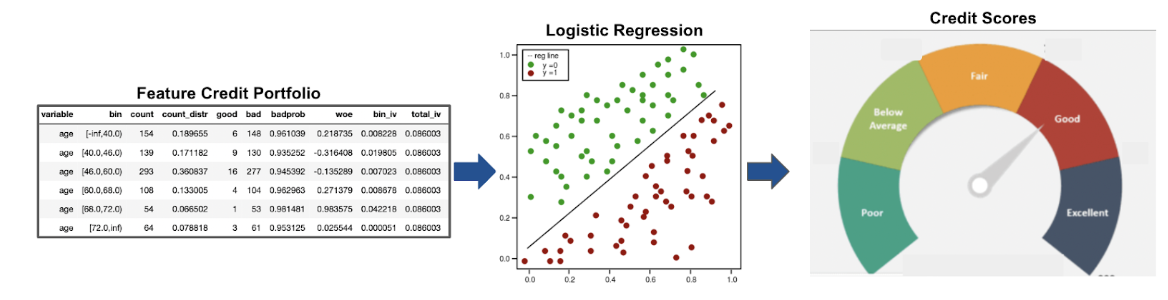

In [36]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import imblearn
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,roc_auc_score,precision_score,recall_score,f1_score
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from optbinning import Scorecard, BinningProcess
import scorecardpy as sc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
print(pd.__version__)


1.3.4


### Data Preparation 

In [3]:
w3_update=pd.read_csv("data_w3_09.09.csv", index_col=0)
w3_update.columns
w3_update=w3_update.drop(columns=['Unnamed: 0.1'])
w3_update.shape
w3_update

,hhid,indiv,zone,sex,age,loan_status,loan_repaid,number_of_loans_12m,total_ammount_borrowed,avg_ammount_borrowed,...,animal_income,crop_exp_value,marital_status,having_bank_account,used_cooperative,used_informal_saving_groups,owned_animals,expected_cropsales_income,used_equipment/machines,cropping_method
0,170097,1,3,1,50,0,0,0,0,0,...,403500.0,50000.0,2,2,2,1,1.0,25000.0,2.0,4.0
1,30032,1,5,1,51,0,0,0,0,0,...,96000.0,0.0,1,2,2,1,1.0,0.0,2.0,4.0
2,50016,1,2,1,58,1,1,3,185000,61666,...,155800.0,893000.0,2,2,2,1,1.0,800000.0,2.0,1.0
3,260083,1,1,1,49,0,0,0,0,0,...,0.0,160000.0,1,2,2,2,2.0,160000.0,2.0,1.0
4,70119,1,1,1,81,0,0,0,0,0,...,0.0,470000.0,1,2,2,2,2.0,370000.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,370027,1,1,1,37,0,0,0,0,0,...,0.0,0.0,1,1,2,2,NaN,NaN,NaN,NaN
4604,370028,1,1,1,51,0,0,0,0,0,...,0.0,0.0,1,1,1,2,NaN,NaN,NaN,NaN
4605,370030,1,1,1,52,0,0,0,0,0,...,0.0,0.0,1,1,2,2,NaN,NaN,NaN,NaN
4606,370036,1,1,1,43,1,2,1,900000,900000,...,0.0,0.0,2,1,2,2,NaN,NaN,NaN,NaN


In [4]:
w3_update.isna().sum()

hhid                              0
indiv                             0
zone                              0
sex                               0
age                               0
loan_status                       0
loan_repaid                       0
number_of_loans_12m               0
total_ammount_borrowed            0
avg_ammount_borrowed              0
total_ammount_paid                0
avg_ammount_paid                  0
ever_applied_for_loan             0
repaying_time                     0
loan_repaid_number                0
plot_owned_number                 0
plot_owning_time                  0
if_plot_measured_GPS              0
plot_size                         0
total_income                     31
savings_income                   31
property_income                  31
other_income                     31
animal_income                    31
crop_exp_value                   31
marital_status                    0
having_bank_account               0
used_cooperative            

In [5]:
w3_update=w3_update.dropna()

In [6]:
w3_update.columns

Index(['hhid', 'indiv', 'zone', 'sex', 'age', 'loan_status', 'loan_repaid',
       'number_of_loans_12m', 'total_ammount_borrowed', 'avg_ammount_borrowed',
       'total_ammount_paid', 'avg_ammount_paid', 'ever_applied_for_loan',
       'repaying_time', 'loan_repaid_number', 'plot_owned_number',
       'plot_owning_time', 'if_plot_measured_GPS', 'plot_size', 'total_income',
       'savings_income', 'property_income', 'other_income', 'animal_income',
       'crop_exp_value', 'marital_status', 'having_bank_account',
       'used_cooperative', 'used_informal_saving_groups', 'owned_animals',
       'expected_cropsales_income', 'used_equipment/machines',
       'cropping_method'],
      dtype='object')

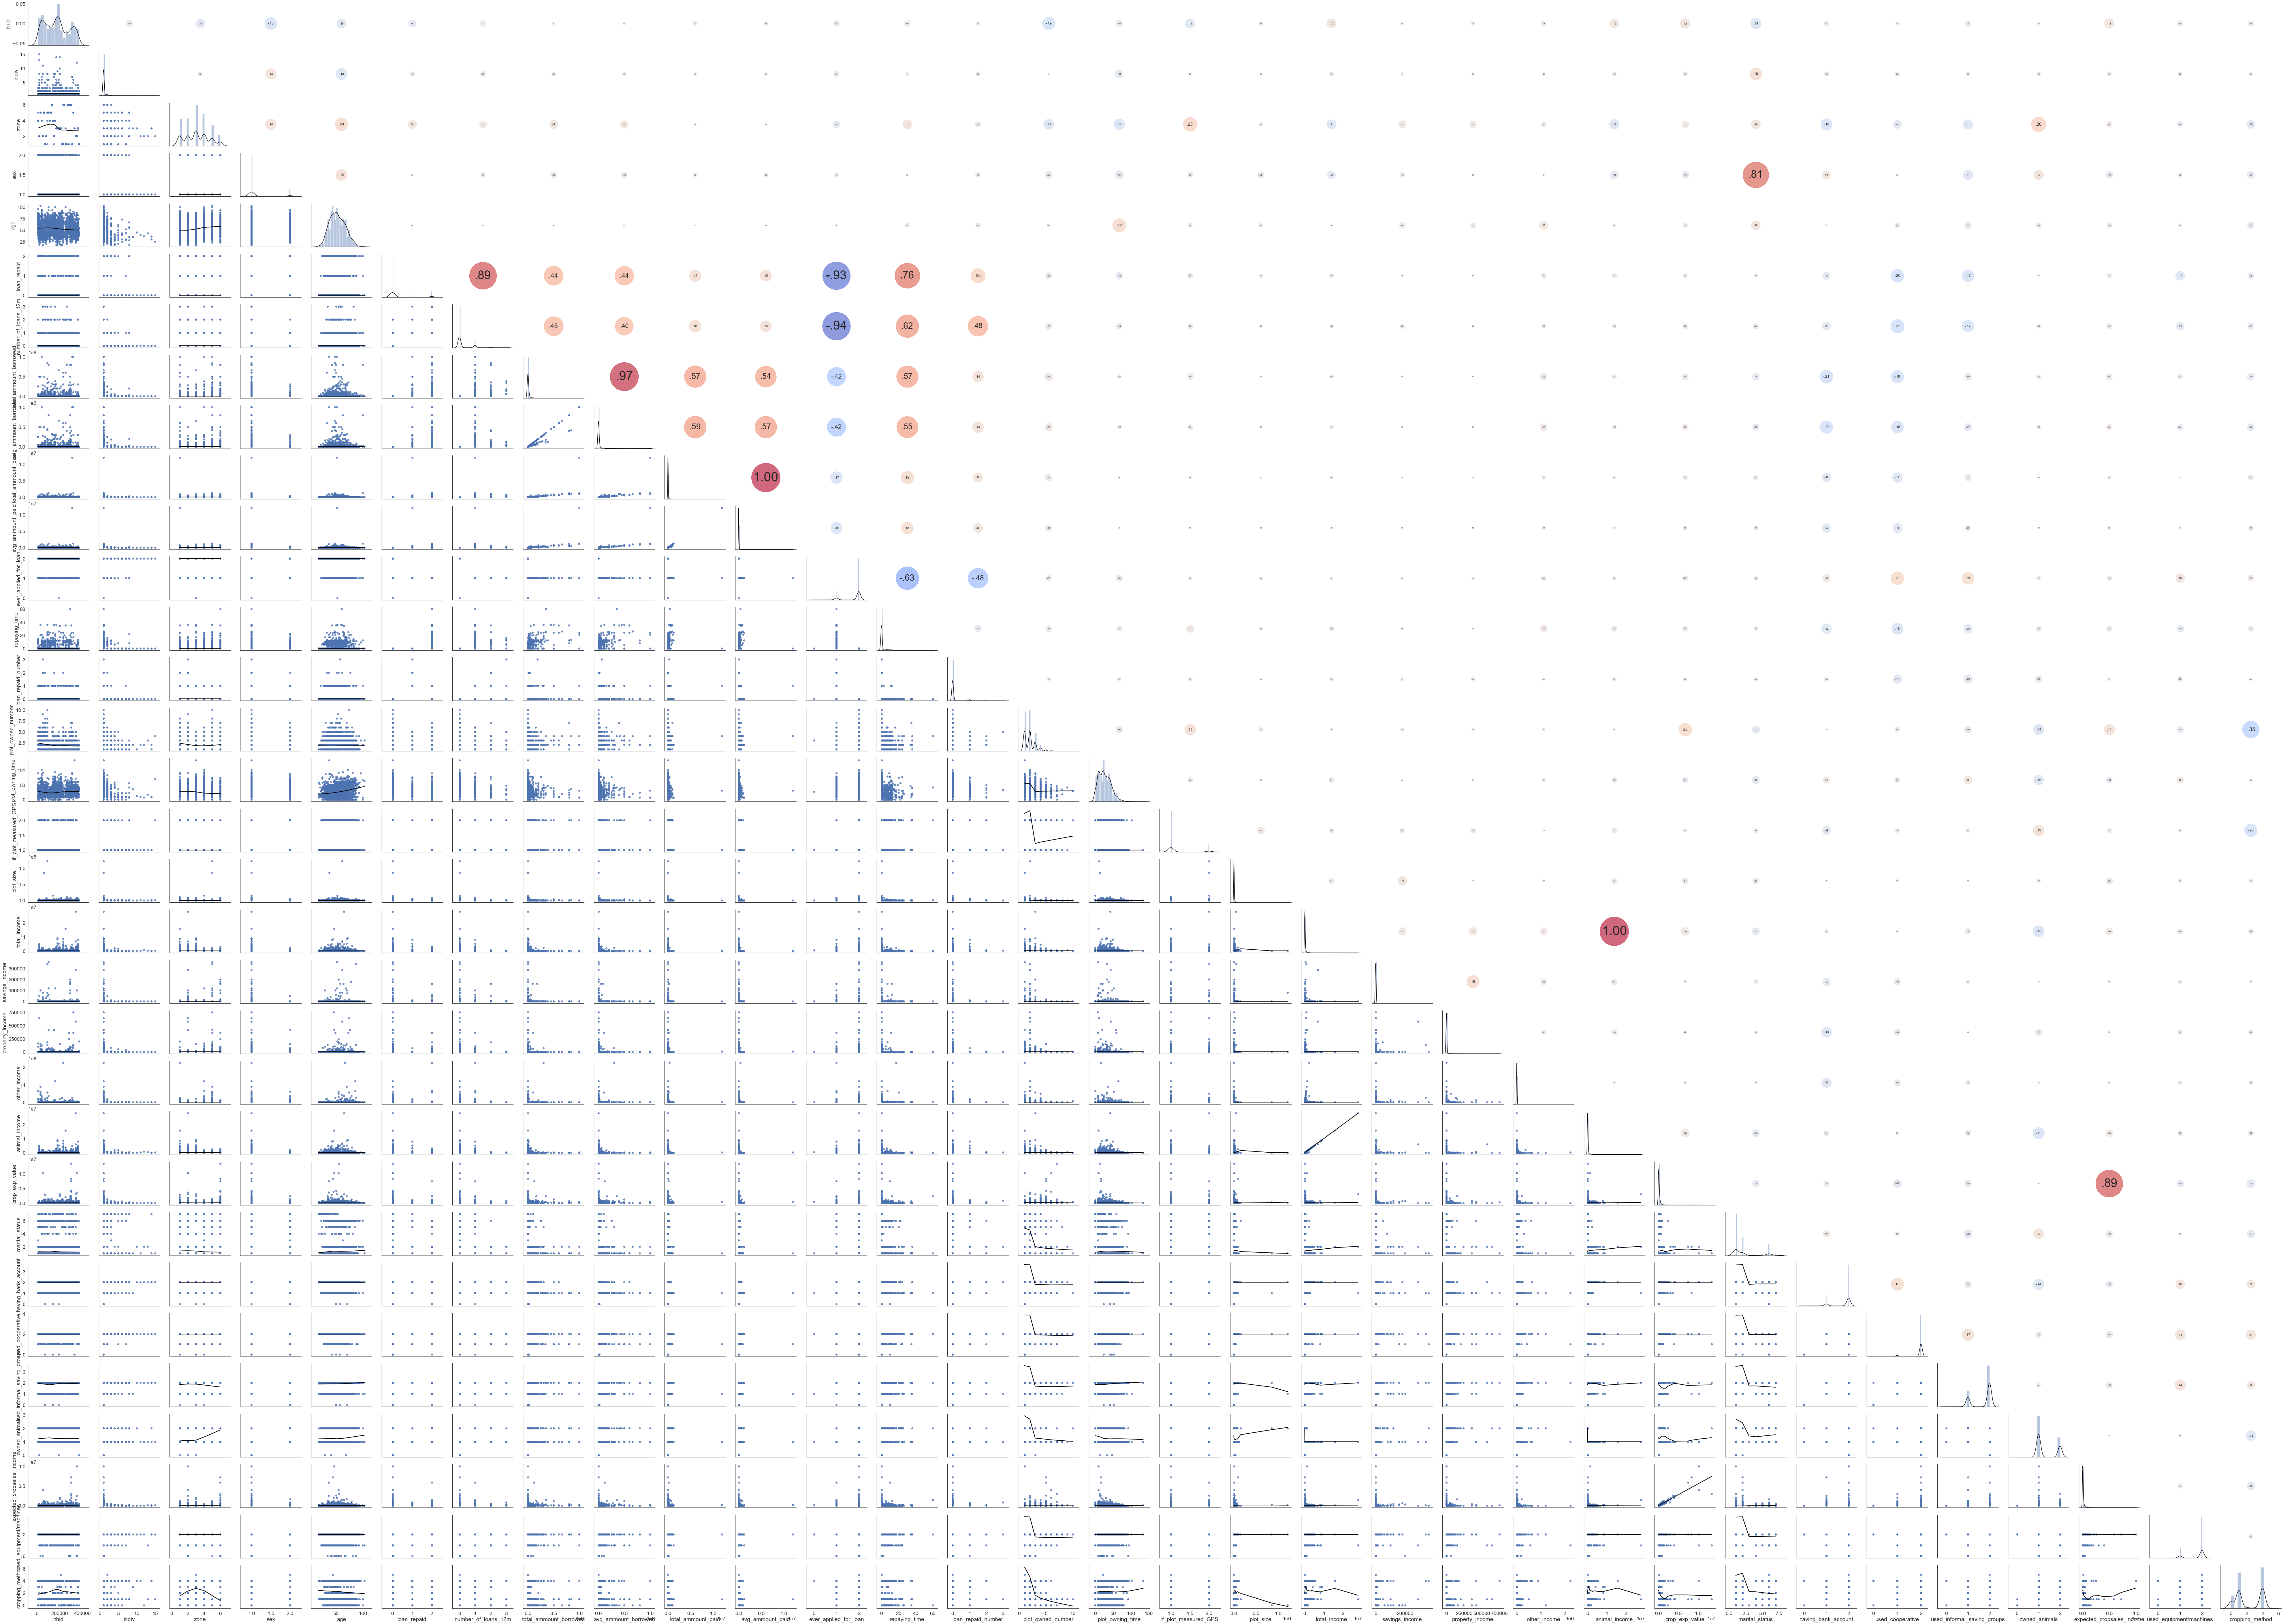

In [19]:
# ref:https://stackoverflow.com/questions/48139899/correlation-matrix-plot-with-coefficients-on-one-side-scatterplots-on-another
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(w3_update.drop(columns=["loan_status"]), aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

#### Loan_status indicates whether or not loan has been received. 1- loan received, 2- loan pending. 0- no loan applied before
'indiv','loan_repaid','number_of_loans_12m','avg_ammount_paid','avg_ammount_borrowed','animal_income','expected_cropsales_income' showed highly correlation with the other features. Remove them before fit in the features in the model

In [7]:
w3_update=w3_update.drop(columns=['indiv','loan_repaid','number_of_loans_12m','avg_ammount_paid','avg_ammount_borrowed','animal_income','expected_cropsales_income'],index=1)

In [8]:
w3_update.columns

Index(['hhid', 'zone', 'sex', 'age', 'loan_status', 'total_ammount_borrowed',
       'total_ammount_paid', 'ever_applied_for_loan', 'repaying_time',
       'loan_repaid_number', 'plot_owned_number', 'plot_owning_time',
       'if_plot_measured_GPS', 'plot_size', 'total_income', 'savings_income',
       'property_income', 'other_income', 'crop_exp_value', 'marital_status',
       'having_bank_account', 'used_cooperative',
       'used_informal_saving_groups', 'owned_animals',
       'used_equipment/machines', 'cropping_method'],
      dtype='object')

In [12]:
#w3_update

In [133]:
w3_update.cropping_method.value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 4.0    1248
1.0    1087
0.0     397
2.0      59
3.0      32
5.0       1
Name: cropping_method, dtype: int64>

## Calculation of Credit Portfolio

Binning was the first step of scorecard development that transformed continuous characteristic features to categorical ones that can help the calculation process of events(good credit in group /sum of good credit) and non-events(bad credit in group/sum of good credit). As the dataset showed the size of (4608,33) and all 33 features were numeric type. Firstly separate the features by nature of data type and re-group the continuous features by five.   

In [10]:
#all the columns are digits, retype the categorical columns

w3_update[['hhid', 'zone', 'sex','loan_status','ever_applied_for_loan',
       'loan_repaid_number',
       'if_plot_measured_GPS', 'marital_status',
       'having_bank_account', 'used_cooperative',
       'used_informal_saving_groups', 'owned_animals',
       'used_equipment/machines', 'cropping_method']]=w3_update[['hhid', 'zone', 'sex','loan_status','ever_applied_for_loan',
       'loan_repaid_number',
       'if_plot_measured_GPS', 'marital_status',
       'having_bank_account', 'used_cooperative',
       'used_informal_saving_groups', 'owned_animals',
       'used_equipment/machines', 'cropping_method']].astype("category")

In [11]:
w3_update.dtypes

hhid                           category
zone                           category
sex                            category
age                               int64
loan_status                    category
total_ammount_borrowed            int64
total_ammount_paid                int64
ever_applied_for_loan          category
repaying_time                     int64
loan_repaid_number             category
plot_owned_number                 int64
plot_owning_time                  int64
if_plot_measured_GPS           category
plot_size                         int64
total_income                    float64
savings_income                  float64
property_income                 float64
other_income                    float64
crop_exp_value                  float64
marital_status                 category
having_bank_account            category
used_cooperative               category
used_informal_saving_groups    category
owned_animals                  category
used_equipment/machines        category


### Binning continious data

In [13]:
#binning continious data
conti=w3_update.select_dtypes(include=["float64","int64"])

#conti["age_group"]=pd.cut(conti.age,5)
#conti["savings_income_group"]=pd.cut(conti.savings_income,5)


count    2824.000000
mean       53.284348
std        14.335150
min        18.000000
25%        43.000000
50%        52.000000
75%        63.000000
max       103.000000
Name: age, dtype: float64

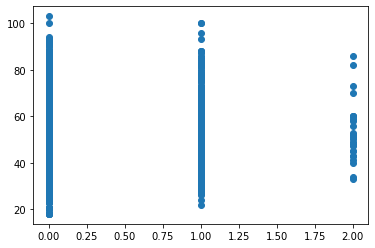

In [14]:
plt.scatter(w3_update["loan_status"],w3_update["age"])
w3_update["age"].describe()

In [15]:
namelist = []
for i in conti.columns:
    namelist.append(i+"_group")
namelist

['age_group',
 'total_ammount_borrowed_group',
 'total_ammount_paid_group',
 'repaying_time_group',
 'plot_owned_number_group',
 'plot_owning_time_group',
 'plot_size_group',
 'total_income_group',
 'savings_income_group',
 'property_income_group',
 'other_income_group',
 'crop_exp_value_group']

In [16]:
conti=conti.reindex(columns=conti.columns.tolist() + namelist)
conti.columns

Index(['age', 'total_ammount_borrowed', 'total_ammount_paid', 'repaying_time',
       'plot_owned_number', 'plot_owning_time', 'plot_size', 'total_income',
       'savings_income', 'property_income', 'other_income', 'crop_exp_value',
       'age_group', 'total_ammount_borrowed_group', 'total_ammount_paid_group',
       'repaying_time_group', 'plot_owned_number_group',
       'plot_owning_time_group', 'plot_size_group', 'total_income_group',
       'savings_income_group', 'property_income_group', 'other_income_group',
       'crop_exp_value_group'],
      dtype='object')

In [17]:
namelist_o=['age', 'total_ammount_borrowed', 'total_ammount_paid', 'repaying_time',
       'plot_owned_number', 'plot_owning_time', 'plot_size', 'total_income',
       'savings_income', 'property_income', 'other_income', 'crop_exp_value']

In [18]:
for i in range(12):
    conti[namelist[i]]=pd.cut(conti[namelist_o[i]], 5)
conti

,age,total_ammount_borrowed,total_ammount_paid,repaying_time,plot_owned_number,plot_owning_time,plot_size,total_income,savings_income,property_income,...,total_ammount_paid_group,repaying_time_group,plot_owned_number_group,plot_owning_time_group,plot_size_group,total_income_group,savings_income_group,property_income_group,other_income_group,crop_exp_value_group
0,50,0,0,0,2,62,2740,403500.0,0.0,0.0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(54.0, 81.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2,58,185000,185000,0,5,33,2093,155800.0,0.0,0.0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(4.6, 6.4]","(27.0, 54.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
3,49,0,0,0,2,24,2095,0.0,0.0,0.0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
4,81,0,0,0,5,32,2095,0.0,0.0,0.0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(4.6, 6.4]","(27.0, 54.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
5,58,160000,200000,4,3,0,2099,0.0,0.0,0.0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(2.8, 4.6]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,52,0,0,0,1,17,1548,88000.0,0.0,0.0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2864,77,0,0,0,1,11,1548,0.0,0.0,0.0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2865,78,8000,8000,21,1,8,1548,0.0,0.0,0.0,...,"(-12000.0, 2400000.0]","(12.0, 24.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2866,83,0,0,0,1,0,1600,85000.0,0.0,0.0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"


In [19]:
w3=pd.merge(w3_update,conti)
w3

,hhid,zone,sex,age,loan_status,total_ammount_borrowed,total_ammount_paid,ever_applied_for_loan,repaying_time,loan_repaid_number,...,total_ammount_paid_group,repaying_time_group,plot_owned_number_group,plot_owning_time_group,plot_size_group,total_income_group,savings_income_group,property_income_group,other_income_group,crop_exp_value_group
0,170097,3,1,50,0,0,0,2,0,0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(54.0, 81.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
1,50016,2,1,58,1,185000,185000,1,0,3,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(4.6, 6.4]","(27.0, 54.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2,260083,1,1,49,0,0,0,2,0,0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
3,70119,1,1,81,0,0,0,2,0,0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(4.6, 6.4]","(27.0, 54.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
4,120069,5,1,58,1,160000,200000,1,4,0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(2.8, 4.6]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,170069,3,1,52,0,0,0,2,0,0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2820,270025,6,1,77,0,0,0,2,0,0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2821,100110,5,2,78,1,8000,8000,1,21,0,...,"(-12000.0, 2400000.0]","(12.0, 24.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2822,40169,4,1,83,0,0,0,2,0,0,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"


In [20]:
w3.columns

Index(['hhid', 'zone', 'sex', 'age', 'loan_status', 'total_ammount_borrowed',
       'total_ammount_paid', 'ever_applied_for_loan', 'repaying_time',
       'loan_repaid_number', 'plot_owned_number', 'plot_owning_time',
       'if_plot_measured_GPS', 'plot_size', 'total_income', 'savings_income',
       'property_income', 'other_income', 'crop_exp_value', 'marital_status',
       'having_bank_account', 'used_cooperative',
       'used_informal_saving_groups', 'owned_animals',
       'used_equipment/machines', 'cropping_method', 'age_group',
       'total_ammount_borrowed_group', 'total_ammount_paid_group',
       'repaying_time_group', 'plot_owned_number_group',
       'plot_owning_time_group', 'plot_size_group', 'total_income_group',
       'savings_income_group', 'property_income_group', 'other_income_group',
       'crop_exp_value_group'],
      dtype='object')

In [21]:
w3_work=w3.drop(columns=['age', 'total_ammount_borrowed', 'total_ammount_paid', 'repaying_time',
       'plot_owned_number', 'plot_owning_time', 'plot_size', 'total_income',
       'savings_income', 'property_income', 'other_income', 'crop_exp_value'])
w3_work

,hhid,zone,sex,loan_status,ever_applied_for_loan,loan_repaid_number,if_plot_measured_GPS,marital_status,having_bank_account,used_cooperative,...,total_ammount_paid_group,repaying_time_group,plot_owned_number_group,plot_owning_time_group,plot_size_group,total_income_group,savings_income_group,property_income_group,other_income_group,crop_exp_value_group
0,170097,3,1,0,2,0,1,2,2,2,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(54.0, 81.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
1,50016,2,1,1,1,3,1,2,2,2,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(4.6, 6.4]","(27.0, 54.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2,260083,1,1,0,2,0,1,1,2,2,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
3,70119,1,1,0,2,0,1,1,2,2,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(4.6, 6.4]","(27.0, 54.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
4,120069,5,1,1,1,0,1,2,1,2,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(2.8, 4.6]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,170069,3,1,0,2,0,2,1,2,2,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2820,270025,6,1,0,2,0,2,2,2,2,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2821,100110,5,2,1,1,0,2,6,2,2,...,"(-12000.0, 2400000.0]","(12.0, 24.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"
2822,40169,4,1,0,2,0,2,1,2,2,...,"(-12000.0, 2400000.0]","(-0.06, 12.0]","(0.991, 2.8]","(-0.135, 27.0]","(-1213.8, 242760.0]","(-27900.0, 5580000.0]","(-360.0, 72000.0]","(-750.0, 150000.0]","(-2240.0, 448000.0]","(-13400.0, 2680000.0]"


## Calculate WOE and IV
     
WOE is determined by multiplying the difference between individual bin good and bad percentages as the formula 1:     
WOE (Weight of Evidence) = ln($\frac{\% of nonevents}{\% of events}$) (1)    



IV can be calculated based on the output of  WOE, to indicate the predictive power of the variable and whether to be incorporated in further analysis as formula 2:     
IV(Information Value) = $\Sigma(\% of nonevents-\% of events)*$WOE  (2)



In [134]:
# filter variable via missing rate, iv, identical value rate
X_s=sc.var_filter(w3_update[w3_update.loan_status!=0], y="loan_status")
dt_s = sc.var_filter(X_s, y="loan_status")
#dt_s
#X_s

[INFO] filtering variables ...
[INFO] filtering variables ...


In [135]:
# breaking dt into train and test
train, test = sc.split_df(dt_s, 'loan_status').values()

In [136]:
dt_s

,sex,if_plot_measured_GPS,owned_animals,repaying_time,plot_owned_number,total_ammount_paid,age,crop_exp_value,used_equipment/machines,cropping_method,...,used_informal_saving_groups,loan_repaid_number,plot_size,having_bank_account,zone,total_ammount_borrowed,total_income,plot_owning_time,used_cooperative,loan_status
2,1,1,1.0,0,5,185000,58,893000.0,2.0,1.0,...,1,3,2093,2,2,185000,155800.0,33,2,1
5,1,1,2.0,4,3,200000,58,177000.0,2.0,1.0,...,1,0,2099,1,5,160000,0.0,0,2,1
6,1,1,1.0,6,6,165000,49,348000.0,1.0,0.0,...,2,0,2100,2,1,150000,133000.0,35,2,1
8,1,1,1.0,24,1,300000,45,0.0,2.0,4.0,...,2,0,237,1,3,250000,39000.0,78,2,1
18,1,1,1.0,6,4,22000,42,39150.0,2.0,1.0,...,1,0,2090,2,1,20000,3500.0,32,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,1,2,2.0,3,1,105000,35,85000.0,2.0,1.0,...,1,0,3096,2,6,100000,0.0,7,1,1
2851,1,2,2.0,3,2,180000,60,230500.0,2.0,1.0,...,1,0,1500,1,5,150000,0.0,37,2,1
2854,1,2,2.0,9,3,52000,77,0.0,2.0,1.0,...,2,0,1548,2,4,40000,0.0,60,2,1
2858,1,2,2.0,0,1,60000,52,30000.0,2.0,4.0,...,1,1,1200,1,6,50000,26000.0,10,1,1


In [137]:

bins=sc.woebin(dt_s,y="loan_status")

[INFO] creating woe binning ...


In [140]:
bins

{'sex':   variable         bin  count  count_distr  good  bad   badprob       woe  \
 0      sex  [-inf,2.0)    440     0.859375    23  417  0.947727 -0.071796   
 1      sex   [2.0,inf)     72     0.140625     2   70  0.972222  0.585960   
 
      bin_iv  total_iv breaks  is_special_values  
 0  0.004576  0.041924    2.0              False  
 1  0.037347  0.041924    inf              False  ,
 'if_plot_measured_GPS':                variable         bin  count  count_distr  good  bad   badprob  \
 0  if_plot_measured_GPS  [-inf,2.0)    424     0.828125    23  401  0.945755   
 1  if_plot_measured_GPS   [2.0,inf)     88     0.171875     2   86  0.977273   
 
         woe    bin_iv  total_iv breaks  is_special_values  
 0 -0.110921  0.010714  0.087196    2.0              False  
 1  0.791812  0.076482  0.087196    inf              False  ,
 'owned_animals':         variable         bin  count  count_distr  good  bad   badprob  \
 0  owned_animals  [-inf,2.0)    355     0.693359    20  33

{'sex': <Figure size 640x480 with 2 Axes>,
 'if_plot_measured_GPS': <Figure size 640x480 with 2 Axes>,
 'owned_animals': <Figure size 640x480 with 2 Axes>,
 'repaying_time': <Figure size 640x480 with 2 Axes>,
 'plot_owned_number': <Figure size 640x480 with 2 Axes>,
 'total_ammount_paid': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'crop_exp_value': <Figure size 640x480 with 2 Axes>,
 'used_equipment/machines': <Figure size 640x480 with 2 Axes>,
 'cropping_method': <Figure size 640x480 with 2 Axes>,
 'marital_status': <Figure size 640x480 with 2 Axes>,
 'used_informal_saving_groups': <Figure size 640x480 with 2 Axes>,
 'loan_repaid_number': <Figure size 640x480 with 2 Axes>,
 'plot_size': <Figure size 640x480 with 2 Axes>,
 'having_bank_account': <Figure size 640x480 with 2 Axes>,
 'zone': <Figure size 640x480 with 2 Axes>,
 'total_ammount_borrowed': <Figure size 640x480 with 2 Axes>,
 'total_income': <Figure size 640x480 with 2 Axes>,
 'plot_owning_ti

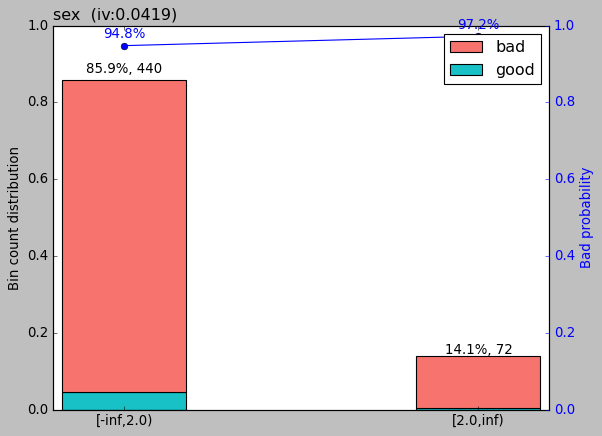

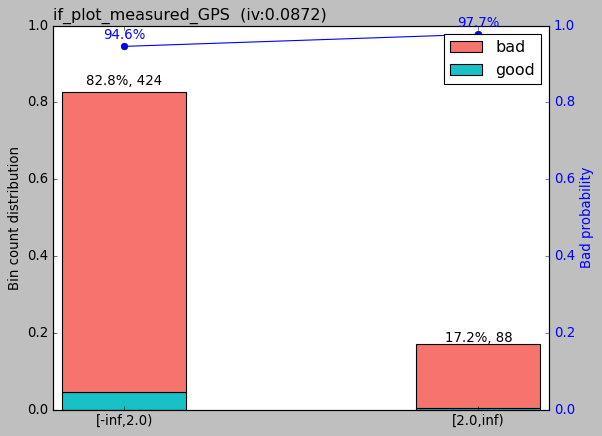

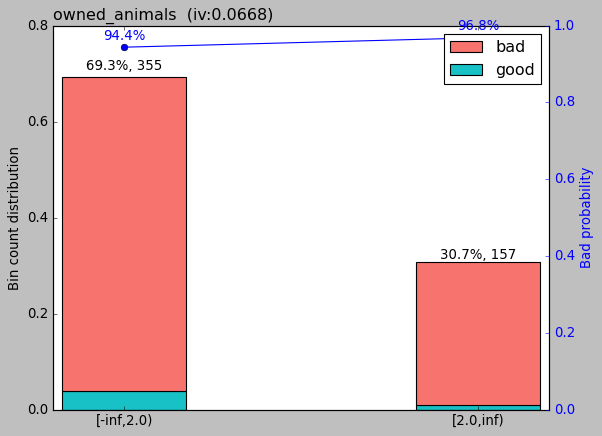

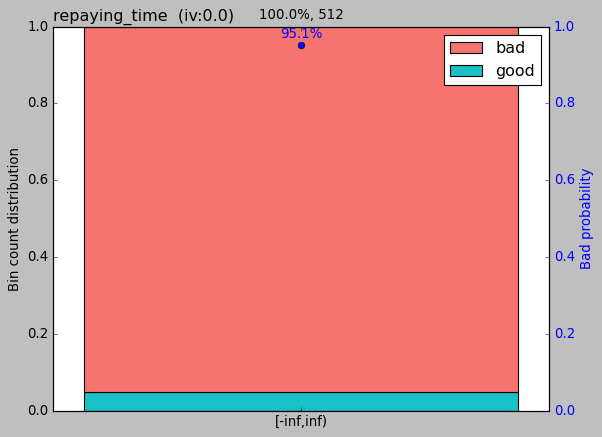

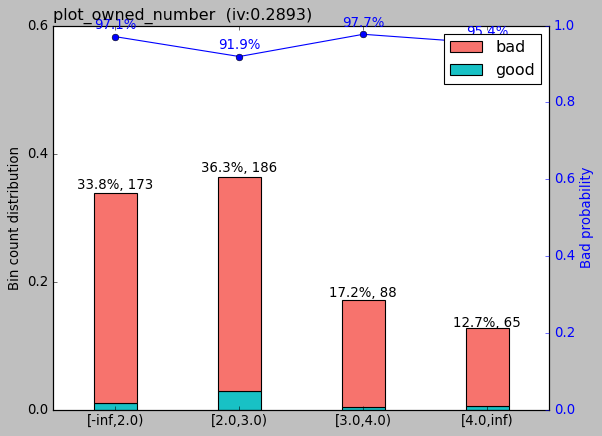

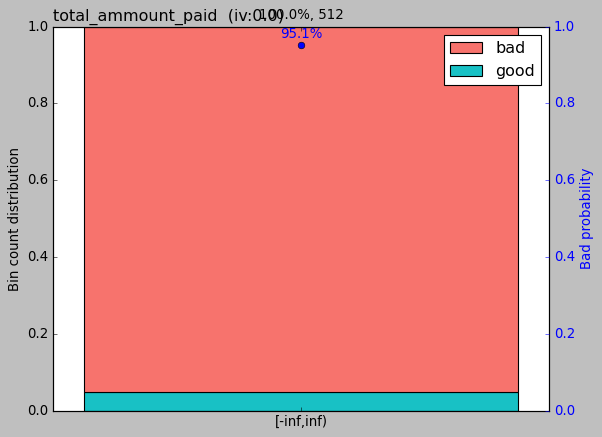

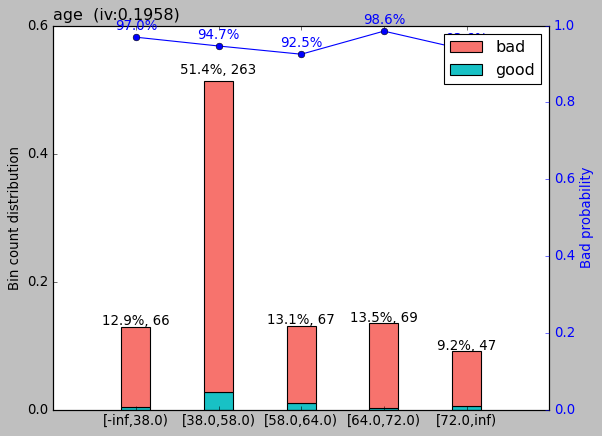

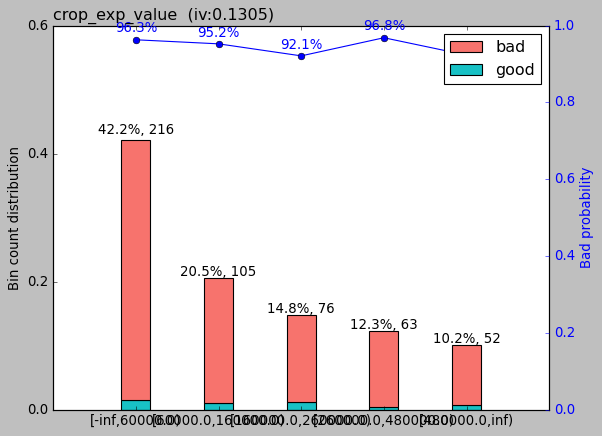

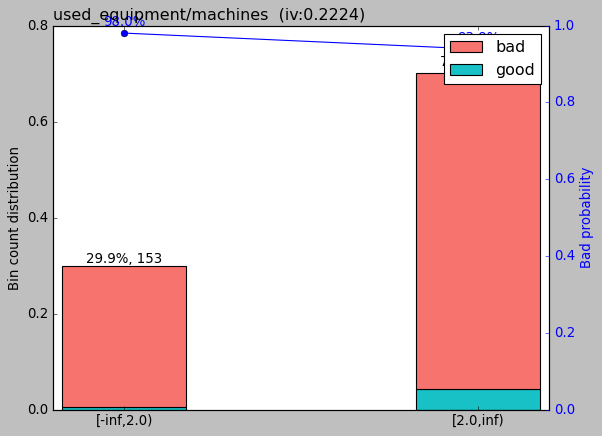

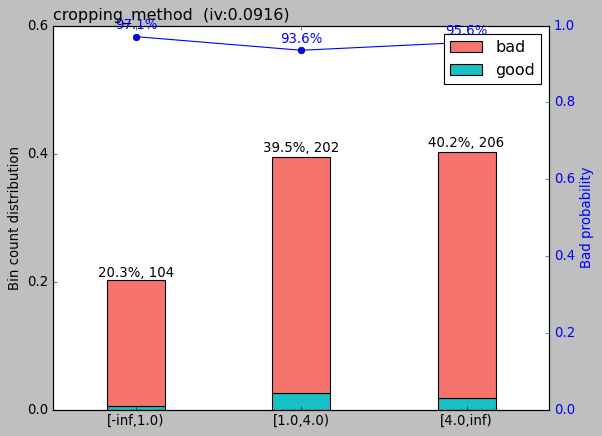

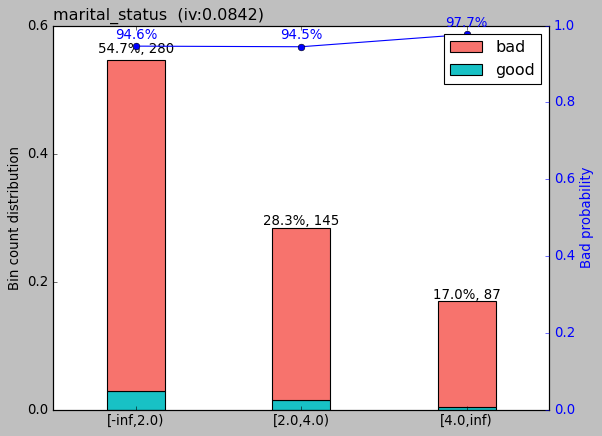

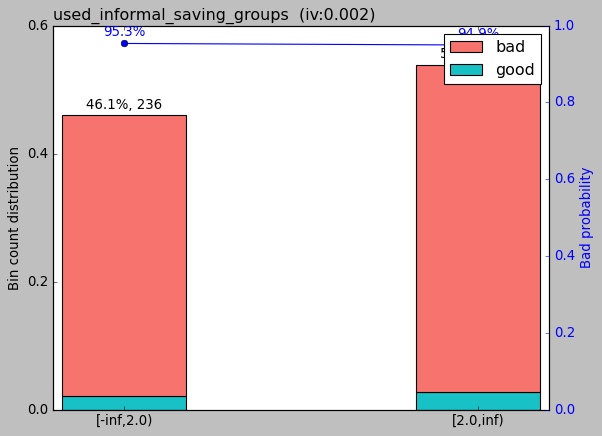

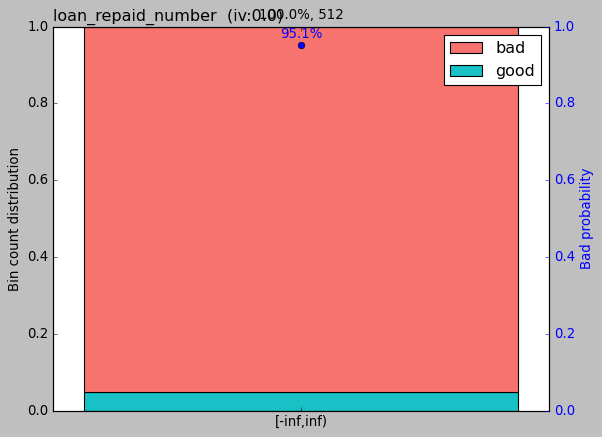

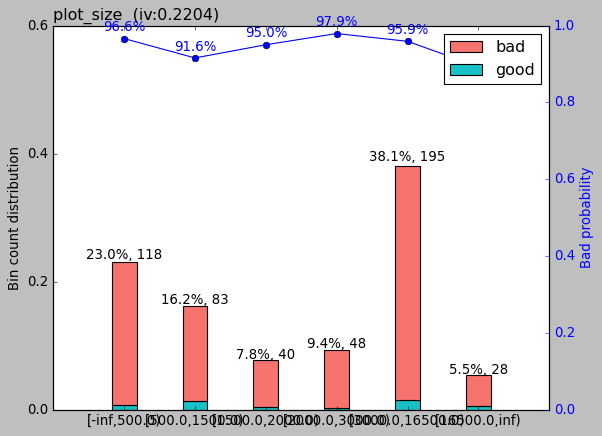

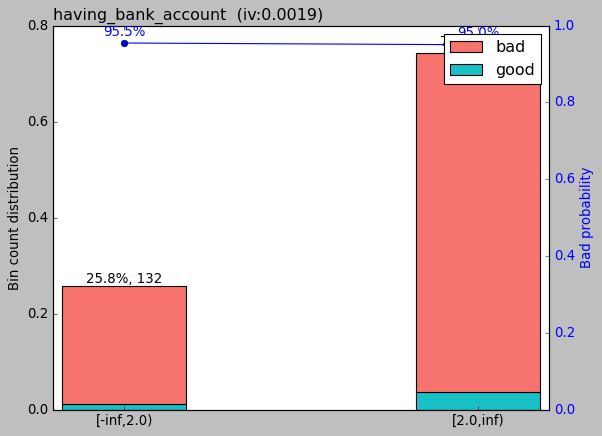

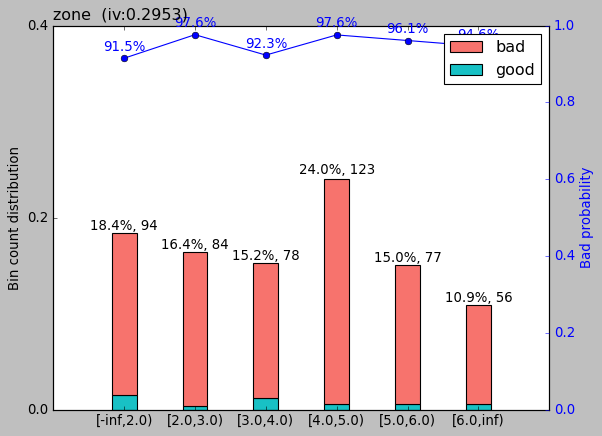

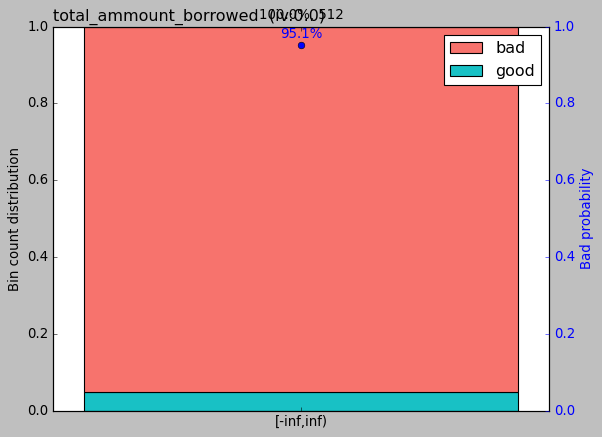

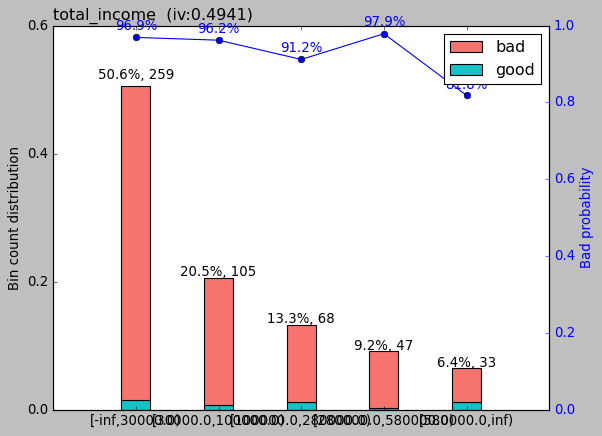

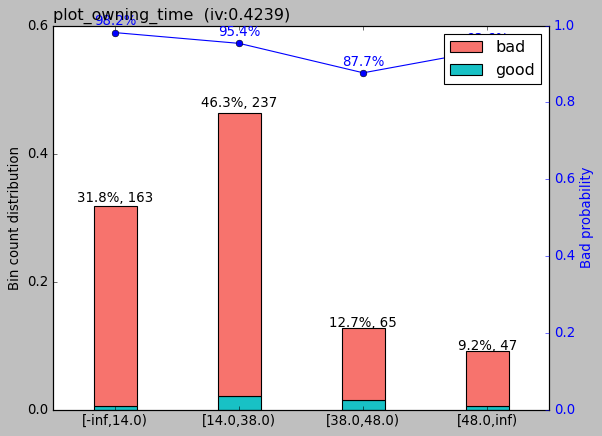

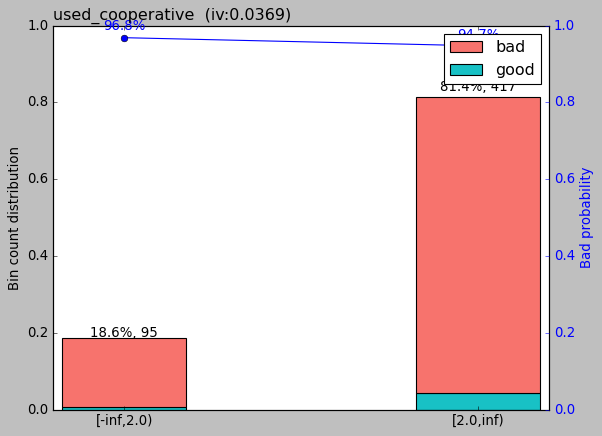

In [180]:
plt.style.use('classic') 
sc.woebin_plot(bins)

#### The lines on the top of the bars explained which subgroups are the most IV contributed groups. For example, the last subgroup of income([580000.0,inf) contributed most of IV 


In [181]:
bins["age"]

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,age,"[-inf,38.0)",66,0.128906,2,64,0.969697,0.496348,0.025521,0.195751,38.0,False
1,age,"[38.0,58.0)",263,0.513672,14,249,0.946768,-0.090993,0.004432,0.195751,58.0,False
2,age,"[58.0,64.0)",67,0.130859,5,62,0.925373,-0.451692,0.032833,0.195751,64.0,False
3,age,"[64.0,72.0)",69,0.134766,1,68,0.985507,1.250119,0.124550,0.195751,72.0,False
4,age,"[72.0,inf)",47,0.091797,3,44,0.936170,-0.283811,0.008415,0.195751,inf,False


#### It gives an example of IV calculation process of age, the final IV of age will be the summation of the individual group bin_iv which is 0.196, negative WOE indicates the group contains bad credit than good credit.

## IV Importance

In [149]:
iv = pd.DataFrame()
attributes = ['sex', 'if_plot_measured_GPS', 'owned_animals', 'repaying_time', 'plot_owned_number', 'total_ammount_paid', 'age', 'crop_exp_value', 'used_equipment/machines', 'cropping_method', 'marital_status', 'used_informal_saving_groups', 'loan_repaid_number', 'plot_size', 'having_bank_account', 'zone', 'total_ammount_borrowed', 'total_income', 'plot_owning_time', 'used_cooperative']
for i in attributes:
    iv = pd.concat([iv,bins[i]])
iv.groupby(["variable"]).mean()["total_iv"].sort_values(ascending=False)

variable
total_income                   0.494102
plot_owning_time               0.423864
zone                           0.295253
plot_owned_number              0.289281
used_equipment/machines        0.222410
plot_size                      0.220432
age                            0.195751
crop_exp_value                 0.130468
cropping_method                0.091600
if_plot_measured_GPS           0.087196
marital_status                 0.084192
owned_animals                  0.066826
sex                            0.041924
used_cooperative               0.036891
used_informal_saving_groups    0.001957
having_bank_account            0.001874
loan_repaid_number             0.000000
repaying_time                  0.000000
total_ammount_borrowed         0.000000
total_ammount_paid             0.000000
Name: total_iv, dtype: float64

Based on the rule of thumb of IV as the table:
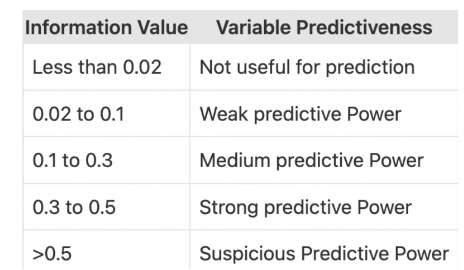
Only the medium and strong features will be included in the modeling, which are 'plot_size_woe', 'plot_owned_number_woe', 'zone_woe', 'total_income_woe', 'age_woe', 'crop_exp_value_woe', 'plot_owning_time_woe', 'used_equipment/machines_woe'. The top two features with strong predicted power IVs are “total_income” and “plot_owning_time”, whose WOE bar plots are listed above.

In [150]:
breaks_adj = {
    'age': [20, 40, 60,80]
}
bins_adj = sc.woebin(dt_s, y="loan_status")

[INFO] creating woe binning ...


In [154]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train[['loan_status',"total_income","plot_owning_time","zone","plot_owned_number","used_equipment/machines","plot_size","age","crop_exp_value" ]], bins_adj)
test_woe = sc.woebin_ply(test[['loan_status',"total_income","plot_owning_time","zone","plot_owned_number","used_equipment/machines","plot_size","age","crop_exp_value" ]], bins_adj)

y_train = train_woe.loc[:,'loan_status']
X_train = train_woe.loc[:,train_woe.columns != 'loan_status']
y_test = test_woe.loc[:,'loan_status']
X_test = test_woe.loc[:,train_woe.columns != 'loan_status']

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [182]:
X_train.columns

Index(['plot_size_woe', 'plot_owned_number_woe', 'zone_woe',
       'total_income_woe', 'age_woe', 'crop_exp_value_woe',
       'plot_owning_time_woe', 'used_equipment/machines_woe'],
      dtype='object')

In [155]:
X_train

,plot_size_woe,plot_owned_number_woe,zone_woe,total_income_woe,age_woe,crop_exp_value_woe,plot_owning_time_woe,used_equipment/machines_woe
2,0.880759,0.059134,0.744184,-0.634013,-0.451692,-0.484482,0.053251,-0.240348
5,0.880759,0.791812,0.236065,0.476623,-0.451692,-0.512653,1.007173,-0.240348
18,0.880759,0.059134,-0.594483,0.476623,-0.090993,0.288708,0.053251,-0.240348
37,0.880759,0.545138,-0.484482,0.859253,-0.090993,0.026344,-0.283811,-0.240348
39,0.880759,-0.535775,-0.097709,-0.634013,-0.451692,-0.512653,0.053251,-0.240348
...,...,...,...,...,...,...,...,...
2812,-0.584565,0.545138,0.236065,-0.634013,0.496348,0.288708,0.053251,-0.240348
2831,0.880759,0.545138,-0.097709,0.476623,1.250119,0.288708,0.053251,-0.240348
2854,-0.024949,0.791812,0.719491,0.476623,-0.283811,0.288708,-0.283811,-0.240348
2858,-0.584565,0.545138,-0.097709,0.476623,-0.090993,0.288708,1.007173,-0.240348


## Modelling 
A logistic regression model was built on the important features using model coefficients. The initial model had Mean ROC-AUC: 0.7769187675070027. Our dataset shows a highly imbalance with less than 30% bad credit which is common in creditworthiness dataset collection. Considering the logistic regression model is sensitive to imbalance datasets, data resampling was applied to the training dataset. The resampling pipeline is the winner because of its better performance. The pipeline was built by oversampling the minority class (bad credit) and undersampling the majority class (good credit).

In [156]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
#lr.coef_
#lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
#train_perf = sc.perf_eva(y_train, train_pred, title = "train")

#test_perf = sc.perf_eva(y_test, test_pred, title = "test")

# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)

#card

In [157]:
y_pred = lr.predict(X_test)

In [158]:
report_logis=pd.DataFrame(classification_report(y_test,y_pred, output_dict=True)).transpose()
report_logis

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,7.000000
1,0.954248,1.000000,0.976589,146.000000
accuracy,0.954248,0.954248,0.954248,0.954248
macro avg,0.477124,0.500000,0.488294,153.000000
weighted avg,0.910590,0.954248,0.931908,153.000000


In [159]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_lr = cross_val_score(lr, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC:',scores_lr.mean())

Mean ROC AUC: 0.7769187675070027


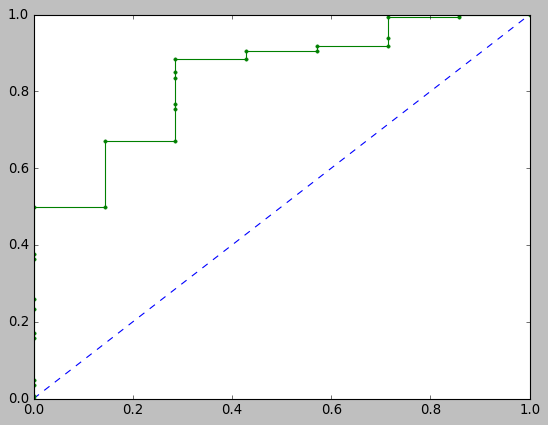

In [160]:
yhat_lr=lr.predict_proba(X_test)
pos_probs_lr = yhat_lr[:, 1]
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs_lr)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')

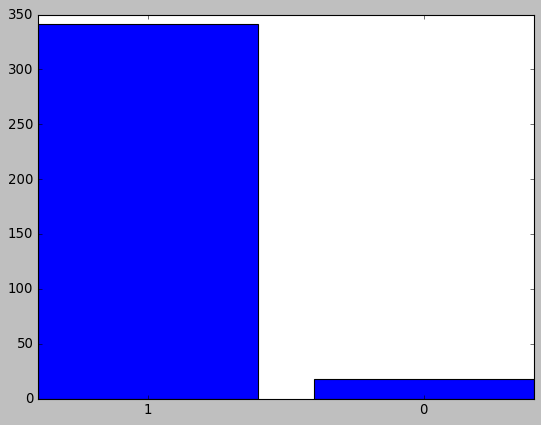

In [161]:
counter=Counter(y_train)
plt.bar(range(len(counter)), list(counter.values()), align='center')
plt.xticks(range(len(counter)), list(counter.keys()))
plt.show()

### Resampling 

#### Oversampling with SMOTE

In [35]:
oversample = SMOTE(k_neighbors=3)
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)

NameError: name 'X_train' is not defined

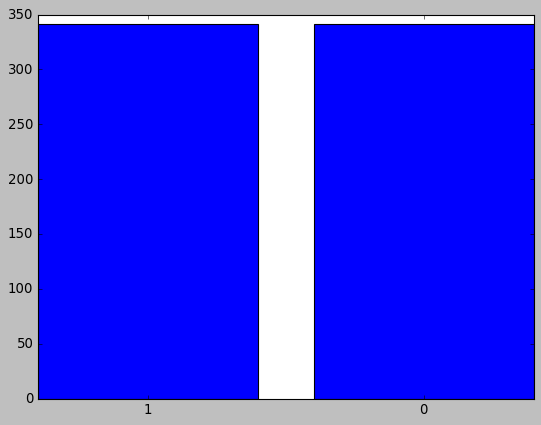

In [163]:
counter=Counter(y_train_o)
plt.bar(range(len(counter)), list(counter.values()), align='center')
plt.xticks(range(len(counter)), list(counter.keys()))
plt.show()

In [164]:
#LogisticRegression after oversampling
classifier =  LogisticRegression()
classifier.fit(X_train_o, y_train_o)
y_pred_o = classifier.predict(X_test)
scores_lr_o = cross_val_score(classifier, X_train_o, y_train_o, scoring='roc_auc', cv=cv, n_jobs=-1)
print("ROC_AUC",scores_lr_o.mean())
report_logis_o=pd.DataFrame(classification_report(y_test,y_pred_o, output_dict=True)).transpose()
report_logis_o

ROC_AUC 0.8675284231339595


,precision,recall,f1-score,support
0,0.116279,0.714286,0.200000,7.000000
1,0.981818,0.739726,0.843750,146.000000
accuracy,0.738562,0.738562,0.738562,0.738562
macro avg,0.549049,0.727006,0.521875,153.000000
weighted avg,0.942218,0.738562,0.814297,153.000000


#### Oversampling and undersampling pipeline

In [165]:
sampling_strategy = {0: 550, 1: 550}
over = SMOTE(sampling_strategy=sampling_strategy )
under = RandomUnderSampler(sampling_strategy=sampling_strategy )
from imblearn.pipeline import Pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train_p, y_train_p = pipeline.fit_resample(X_train, y_train)

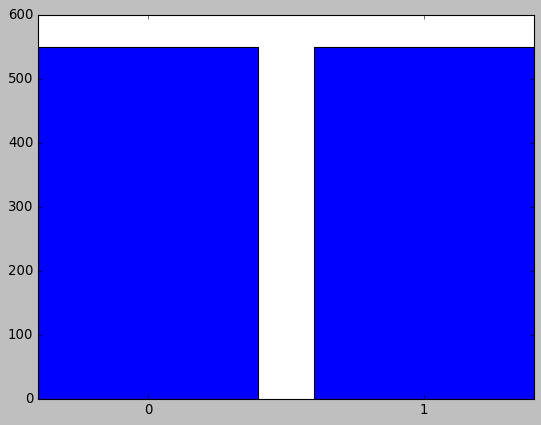

In [166]:
counter=Counter(y_train_p)
plt.bar(range(len(counter)), list(counter.values()), align='center')
plt.xticks(range(len(counter)), list(counter.keys()))
plt.show()

ROC_AUC 0.8750853994490357


,precision,recall,f1-score,support
0,0.121951,0.714286,0.208333,7.000000
1,0.982143,0.753425,0.852713,146.000000
accuracy,0.751634,0.751634,0.751634,0.751634
macro avg,0.552047,0.733855,0.530523,153.000000
weighted avg,0.942788,0.751634,0.823232,153.000000


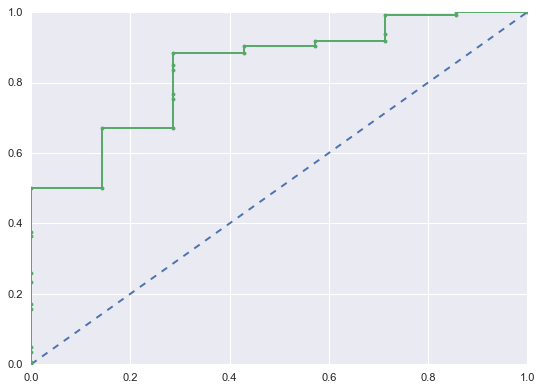

In [258]:
plt.style.use('seaborn')
#LogisticRegression after resampling pipeline
classifier =  LogisticRegression()
classifier.fit(X_train_p, y_train_p)
y_pred_p = classifier.predict(X_test)
scores_lr_p = cross_val_score(classifier, X_train_p, y_train_p, scoring='roc_auc', cv=cv, n_jobs=-1)
print("ROC_AUC",scores_lr_p.mean())
yhat_lr_p=lr.predict_proba(X_test)
pos_probs_lr = yhat_lr[:, 1]
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs_lr)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
report_logis_p=pd.DataFrame(classification_report(y_test,y_pred_p, output_dict=True)).transpose()
report_logis_p

In [185]:
lr.coef_

array([[0.79659788, 0.60437261, 0.44453309, 0.93219599, 0.79622995,
        0.        , 0.59669529, 0.30194393]])

In [184]:
classifier.coef_

array([[ 1.50099488,  1.26763718,  0.76824287,  1.85516201,  1.66342359,
        -0.38469846,  1.31809592,  0.76008542]])

### Ramdom Forest

In [150]:
clf_rf=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
y_pred_rf=clf_rf.predict(X_test)
report_rf=pd.DataFrame(classification_report(y_test,y_pred_rf, output_dict=True)).transpose()
report_rf

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,12.000000
1,0.950617,0.995690,0.972632,232.000000
accuracy,0.946721,0.946721,0.946721,0.946721
macro avg,0.475309,0.497845,0.486316,244.000000
weighted avg,0.903866,0.946721,0.924797,244.000000


In [151]:
clf_rf=RandomForestClassifier(n_estimators=100).fit(X_train_p,y_train_p)
y_pred_rf_p=clf_rf.predict(X_test)
report_rf_p=pd.DataFrame(classification_report(y_test,y_pred_rf_p, output_dict=True)).transpose()
report_rf_p

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,12.000000
1,0.950617,0.995690,0.972632,232.000000
accuracy,0.946721,0.946721,0.946721,0.946721
macro avg,0.475309,0.497845,0.486316,244.000000
weighted avg,0.903866,0.946721,0.924797,244.000000


In [226]:
list(card.values())[1]


{'sex':   variable         bin  count  count_distr  good  bad   badprob       woe  \
 0      sex  [-inf,2.0)    440     0.859375    23  417  0.947727 -0.071796   
 1      sex   [2.0,inf)     72     0.140625     2   70  0.972222  0.585960   
 
      bin_iv  total_iv breaks  is_special_values  
 0  0.004576  0.041924    2.0              False  
 1  0.037347  0.041924    inf              False  ,
 'if_plot_measured_GPS':                variable         bin  count  count_distr  good  bad   badprob  \
 0  if_plot_measured_GPS  [-inf,2.0)    424     0.828125    23  401  0.945755   
 1  if_plot_measured_GPS   [2.0,inf)     88     0.171875     2   86  0.977273   
 
         woe    bin_iv  total_iv breaks  is_special_values  
 0 -0.110921  0.010714  0.087196    2.0              False  
 1  0.791812  0.076482  0.087196    inf              False  ,
 'owned_animals':         variable         bin  count  count_distr  good  bad   badprob  \
 0  owned_animals  [-inf,2.0)    355     0.693359    20  33

In [115]:
list(card.values())[2]

,variable,bin,points
45,plot_owning_time,"[-inf,2.0)",-3.0
46,plot_owning_time,"[2.0,38.0)",-20.0
47,plot_owning_time,"[38.0,48.0)",62.0
48,plot_owning_time,"[48.0,inf)",17.0


In [252]:
card1=sc.scorecard(bins, odds0=0.03225806451612903,xcolumns=X_train_p.columns,model=classifier,pdo=20)
#card1

In [253]:
score = sc.scorecard_ply(dt_s, card1, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)

score.score.sort_values(ascending=False)
score[score.score>=600]
score

,plot_size_points,plot_owned_number_points,zone_points,total_income_points,age_points,crop_exp_value_points,plot_owning_time_points,used_equipment/machines_points,score
2,-38.0,-2.0,-16.0,34.0,22.0,-5.0,-2.0,5.0,497.0
5,-38.0,-29.0,-5.0,-26.0,22.0,-6.0,-38.0,5.0,384.0
6,-38.0,-2.0,13.0,34.0,4.0,5.0,-2.0,-21.0,492.0
8,-16.0,-20.0,11.0,-14.0,4.0,3.0,11.0,5.0,483.0
18,-38.0,-2.0,13.0,-26.0,4.0,3.0,-2.0,5.0,456.0
...,...,...,...,...,...,...,...,...,...
2846,-8.0,-20.0,2.0,-26.0,-24.0,0.0,-38.0,5.0,390.0
2851,1.0,20.0,-5.0,-26.0,22.0,-6.0,-2.0,5.0,508.0
2854,1.0,-29.0,-16.0,-26.0,14.0,3.0,11.0,5.0,462.0
2858,25.0,-20.0,2.0,-26.0,4.0,3.0,-38.0,5.0,454.0


In [256]:
score["score"].mean()

462.046875

## Credit Score Distribution
The last step is to scale the model to scores because the scores are easy to understand and implement. Both WOE and coefficients of the model are included in modeling. The score formula can be written as :
$Score = logit* factor +offset$.   
600 is set as the baseline score and correspond the bad/good odds as 30, points to double the odds as 20. The credit scores are distributed as the plot with mean of 462.046875.

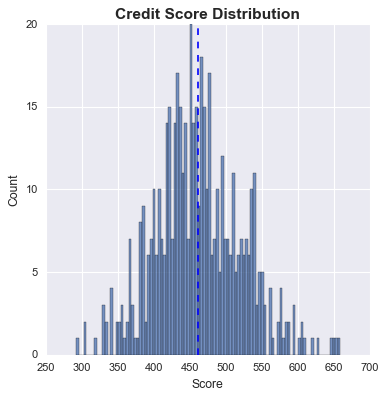

In [254]:
plt.style.use('seaborn')
import seaborn as sns
sns.displot(score["score"],bins=100)
plt.axvline(x=score["score"].mean(),
            color='blue',
            ls='--', 
            lw=1.5)
plt.title('Credit Score Distribution', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count');

In [288]:
q_50=np.quantile(score.score,0.5)
q_75=np.quantile(score.score,0.75)
q_90=np.quantile(score.score,0.9)
d_min=score.score.min()
d_max=score.score.max()
print(q_50,q_75,q_90)

458.0 500.25 539.0


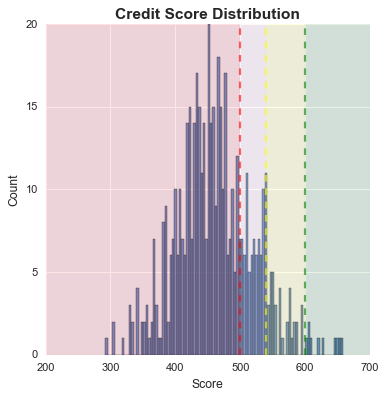

In [286]:
plt.style.use('seaborn')
import seaborn as sns
sns.displot(score["score"],bins=100)

plt.title('Credit Score Distribution', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count');

#plt.axvline(q_50, color='red', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(q_75, color='red', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(q_90, color='yellow', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(600, color='green', linestyle='dashed', linewidth=2, alpha=0.6)

plt.axvspan(200, q_75, alpha=0.1, color='red')
plt.axvspan(q_75, q_90, alpha=0.1, color='pink')
plt.axvspan(q_90, 600, alpha=0.1, color='yellow')
plt.axvspan(600, 700, alpha=0.1, color='green');

There are multiple ways to use the credit scores depending on the purpose.  In this case, our client wishes to compare the farmer loan applicants’ creditworthiness and provide suggestions who are the best candidates to the financial organization to grant a loan. The recommendation is to compare all the credit scores of the farmers and recommend the highest ones. For example, No. 2 applicant has better credit (score 497) than No. 5 (score 384). 

Another use case is to help build credit rating tier schemes. There are various methods to decide the cutoff score and much depends on the purpose of loan providers.  Here just provide one possibility to use quantiles (0.75 and 0.9) to determine the score tiers.  Bad credit (less than 500), Fair(500-539), Good(539-600), Excellent(600 and over ). 


## PSI - test distribution stability 

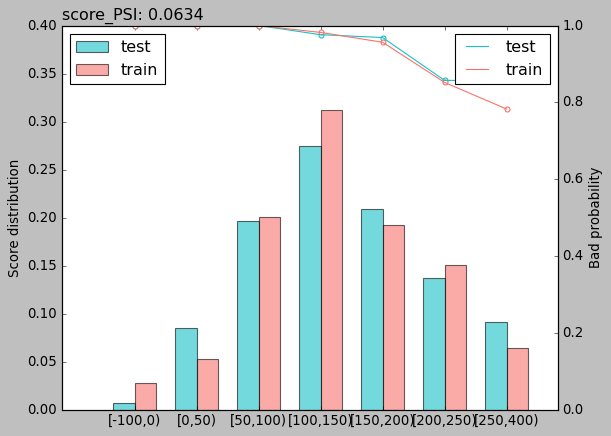

{'psi':   variable       PSI
 0    score  0.063388,
 'pic': {'score': <Figure size 640x480 with 2 Axes>}}

In [178]:
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# psi
sc.perf_psi(
  score = {'train':train_score[:], 'test':test_score[:]},
  label = {'train':y_train[:], 'test':y_test[:]}
)

PSI (Population Stability Index)plot tests the stability of distribution of test and train probability.    
The rule of thumb for the PSI is as follows: Less than 0.1 inference 
insignificant change, no action required; 0.1 - 0.25 inference some 
minor change, check other scorecard monitoring metrics; Greater than 
0.25 inference major shift in population, need to delve deeper.

In our case, the PSI = 0.0634 which is less than 0.1 and indicates a stable distribution. No action required. 

Reference:    
https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html    
https://medium.com/analytics-vidhya/credit-risk-modelling-in-python-3ab4b00f6505    
https://towardsdatascience.com/developing-scorecards-in-python-using-optbinning-ab9a205e1f69
https://github.com/ShichenXie/scorecardpy    
https://blogs.sas.com/content/subconsciousmusings/2019/01/18/building-credit-scorecards-using-statistical-methods-and-business-logic/    
https://towardsdatascience.com/intro-to-credit-scorecard-9afeaaa3725f    
https://www.listendata.com/2015/05/population-stability-index.html    
https://rstudio-pubs-static.s3.amazonaws.com/441239_e4a46ef90bd5421bb810e95c06f22df8.html    
https://mwburke.github.io/data%20science/2018/04/29/population-stability-index.html    
https://github.com/ShichenXie/scorecardpy
https://datascience.stackexchange.com/questions/38817/credit-scoring-using-scorecardpy-with-xgboost
https://medium.com/analytics-vidhya/credit-risk-modelling-in-python-3ab4b00f6505


